In [95]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer , TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV , train_test_split

from config import ConfigManager

config = ConfigManager()
train_data_path = os.path.join(config.DATA_PATH , "movie_review" , 'train.tsv')

df = pd.read_table(train_data_path,names=['text','label'])
df['text_len'] = df['text'].map(lambda x : len(x.split()))
train_X , valid_X , train_y , valid_y = train_test_split(df['text'],df['label'])

/home/liubin/tutorials/self-allennlp/config.py:18: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  yaml_config_dict = yaml.load(open(YAML_CONFIG_PATH, encoding="utf-8"))


In [401]:
vect = CountVectorizer(binary=True)
tfidf = TfidfTransformer(use_idf=True)
clf = SGDClassifier(penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.1)
data_vect = vect.fit_transform(train_X)
data_tfidf = tfidf.fit_transform(data_vect)
clf.fit(data_vect , train_y)
accuracy_score(clf.predict(data_tfidf),train_y)

0.9958333333333333

In [402]:
data_vect_v = vect.transform(valid_X)
data_tfidf_v = tfidf.transform(data_vect_v)
# clf.fit(data_tfidf_v , valid_y)
clf.score(data_vect_v,valid_y)

0.86

In [227]:
clf.n_iter_

1

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(clf.predict(data_tfidf),train_y)

1.0

In [42]:


parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    #'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    #'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    #'clf__n_iter': (10, 50, 80),
}

In [43]:
# grid_search = GridSearchCV(pipeline, parameters, n_jobs=1, verbose=1)
grid_search = pipeline.

In [47]:
import time
print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
print(parameters)
t0 = time.time()
grid_search.fit(df['text'], df['label'])
print("done in %0.3fs" % (time.time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'vect__max_df': (0.5, 0.75, 1.0), 'vect__ngram_range': ((1, 1), (1, 2)), 'clf__alpha': (1e-05, 1e-06), 'clf__penalty': ('l2', 'elasticnet')}
Fitting 5 folds for each of 24 candidates, totalling 120 fits


TypeError: 'module' object is not callable

In [32]:
print(data.nnz / float(data.shape[0]))

332.935


In [22]:
data.nnz

518246

In [398]:
r

[[{'alpha': 0.007930385563326956}, 0],
 [{'alpha': 0.002087040690291714}, 0],
 [{'alpha': 0.0008905960211534999}, 0],
 [{'alpha': 2.533014040528926e-05}, 0],
 [{'alpha': 0.06284600365837575}, 0],
 [{'alpha': 0.011850138505345099}, 0],
 [{'alpha': 0.00018358009188818613}, 0],
 [{'alpha': 0.006306402958287863}, 0],
 [{'alpha': 0.00024236551594002034}, 0],
 [{'alpha': 0.0648710572749603}, 0],
 [{'alpha': 0.00039216592930031507}, 0],
 [{'alpha': 0.01944503901120982}, 0],
 [{'alpha': 0.0028408730352083586}, 0]]

In [397]:
import optuna
import sklearn.datasets
import sklearn.linear_model
import sklearn.model_selection
r = []

def objective(trial):
    iris = sklearn.datasets.load_iris()
    classes = list(set(iris.target))
    train_x, valid_x, train_y, valid_y = sklearn.model_selection.train_test_split(
        iris.data, iris.target, test_size=0.25, random_state=0
    )

    alpha = trial.suggest_float("alpha", 1e-5, 1e-1, log=True)
    clf = sklearn.linear_model.SGDClassifier(alpha=alpha)

    for step in range(100):
        clf.partial_fit(train_x, train_y, classes=classes)

        # Report intermediate objective value.
        intermediate_value = 1.0 - clf.score(valid_x, valid_y)
        trial.report(intermediate_value, step) # report 汇报每个step的验证集评价

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            r.append([trial.params,step])
            raise optuna.TrialPruned()
    
    return 1.0 - clf.score(valid_x, valid_y) # 返回最终的验证集评价

study = optuna.create_study(pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=20)

[I 2021-04-02 11:08:15,695] A new study created in memory with name: no-name-8a10696e-1dcf-425d-9e4a-83e64423795a
[I 2021-04-02 11:08:15,876] Trial 0 finished with value: 0.1842105263157895 and parameters: {'alpha': 1.4291381571743018e-05}. Best is trial 0 with value: 0.1842105263157895.
[I 2021-04-02 11:08:16,054] Trial 1 finished with value: 0.07894736842105265 and parameters: {'alpha': 0.005107553051420537}. Best is trial 1 with value: 0.07894736842105265.
[I 2021-04-02 11:08:16,232] Trial 2 finished with value: 0.02631578947368418 and parameters: {'alpha': 0.0005524070793445816}. Best is trial 2 with value: 0.02631578947368418.
[I 2021-04-02 11:08:16,410] Trial 3 finished with value: 0.1842105263157895 and parameters: {'alpha': 0.0008592746649733886}. Best is trial 2 with value: 0.02631578947368418.
[I 2021-04-02 11:08:16,605] Trial 4 finished with value: 0.10526315789473684 and parameters: {'alpha': 7.388239947010528e-05}. Best is trial 2 with value: 0.02631578947368418.
[I 2021-0

In [306]:
a = pd.read_csv("../a",header=None)

In [360]:
a['c'] = a['b'].map(math.log)

In [361]:
a = a.sort_values(by='b')

In [382]:
a

,a,b,c
31,31,2.636271e-10,-22.056485
32,32,2.959118e-10,-21.940960
27,27,2.091189e-07,-15.380363
25,25,1.647922e-05,-11.013411
48,48,8.282536e-05,-9.398776
...,...,...,...
82,82,2.635495e+05,12.481996
83,83,1.162017e+06,13.965668
84,84,2.738270e+06,14.822837
85,85,3.311444e+06,15.012895


/home/liubin/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


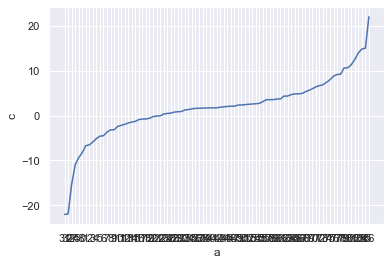

In [362]:
sns.lineplot('a','c',data=a)

In [364]:
b = """
3065604677.38784
6185976327.764417
7879052374.208552
301600215.80843544
9297610650.519218
489165687.69311523
3013358940.51073
4406368022.806358
9895224022.36684
6992962464.40174
"""

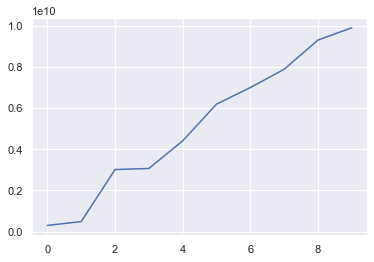

In [381]:
b.plot(kind='line')

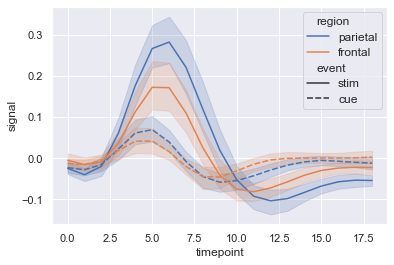

In [325]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)